In [ ]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

breakupdata = PROJPATH / "data/breakupdata/derived/breakupDate_cleaned.csv"
predictordir  = PROJPATH / "data/predictors"
icefn = "ice_thickness_POR_BobBusey.csv"


### Load ice thickness

We impute average ice for the years with missing ice

In [ ]:
ice = pd.read_csv(predictordir / icefn).set_index('year')
ice.index.name = 'Year'
ice_average = ice.NenanaIceThick.mean()
ice_extras = { key: ice_average for key in range(1980, 1989)}
ice_extrasDF = pd.DataFrame.from_dict(ice_extras, orient='index')
ice_extrasDF.index.name = 'Year'
ice_extrasDF.columns = ['NenanaIceThick']
ice = pd.concat([ice_extrasDF, ice])
ice

,NenanaIceThick
Year,
1980,39.755556
1981,39.755556
1982,39.755556
1983,39.755556
1984,39.755556
1985,39.755556
1986,39.755556
1987,39.755556
1988,39.755556


### Load location table with HUCs

In [ ]:
huctable_aug = pd.read_csv(PROJPATH / "data/breakupdata/derived/breakupDate_mean_std_HUC_augmented.csv", index_col=0)
huctable_aug.sort_values(['river', 'mean_days'], inplace=True)
huctable_aug

,siteID,mean_days,std_days,lat,lon,objectid,huc6,name,river,locality,mean_date
33,Buckland River at Buckland,75.090909,8.326778,65.978508,-161.120656,27,190502,Northern Seward Peninsula,Buckland River,Buckland,05-15
37,Chena River at Fairbanks,53.933333,7.574610,64.844761,-147.719989,38,190803,Tanana River,Chena River,Fairbanks,04-24
38,Chisana River at Northway,52.812500,5.991594,62.983449,-141.958823,38,190803,Tanana River,Chisana River,Northway,04-23
0,Gakona River at Gakona,59.235294,10.476695,62.305650,-145.285421,1,190201,Copper River,Gakona River,Gakona,04-29
1,Gulkana River nr Gakona,58.484848,9.421124,62.299913,-145.370357,1,190201,Copper River,Gulkana River,Gakona,04-28
7,Kobuk River at Kobuk,73.333333,6.944643,66.907427,-156.889256,5,190503,Kobuk-Selawik Rivers,Kobuk River,Kobuk,05-13
8,Kobuk River at Shungnak,74.812500,7.045646,66.886574,-157.132841,5,190503,Kobuk-Selawik Rivers,Kobuk River,Shungnak,05-15
6,Kobuk River at Ambler,75.526316,6.828940,67.084932,-157.851781,5,190503,Kobuk-Selawik Rivers,Kobuk River,Ambler,05-16
35,Koyukuk River at Bettles,67.439024,6.580459,66.922616,-151.519083,31,190901,Koyukuk River,Koyukuk River,Bettles,05-07
34,Koyukuk River at Allakaket,67.888889,6.688061,66.565835,-152.650807,31,190901,Koyukuk River,Koyukuk River,Allakaket,05-08


### Load and select static predictors

In [ ]:
predictors_static = pd.read_csv(predictordir / 'predictors_tele_seaice_20240409.csv', index_col=0)

<AxesSubplot: >

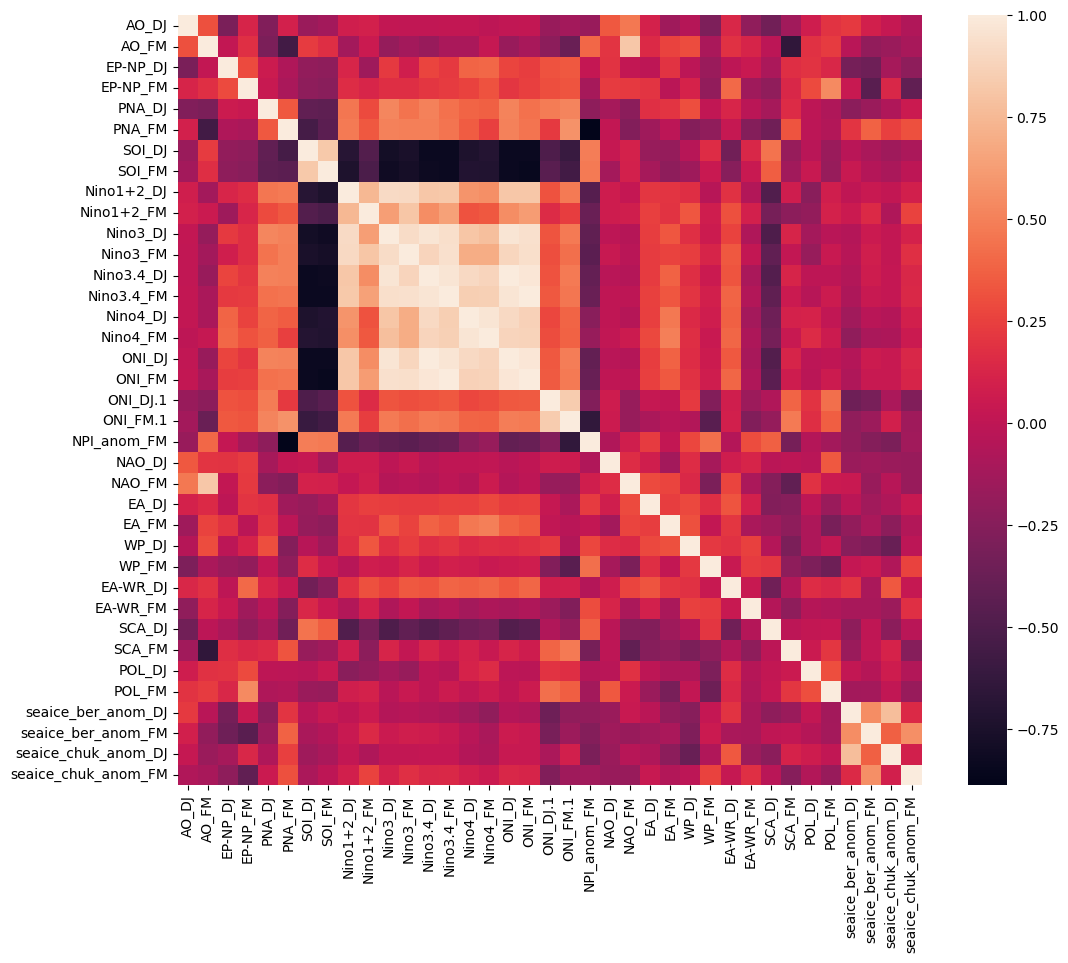

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(predictors_static.corr())

In [ ]:
predictors_static.drop(columns=['SOI_DJ', 'SOI_FM','Nino3_DJ', 'Nino3_FM',
       'Nino3.4_DJ', 'Nino3.4_FM', 'ONI_DJ', 'ONI_FM',
       'ONI_DJ.1', 'ONI_FM.1',], inplace=True)


<AxesSubplot: >

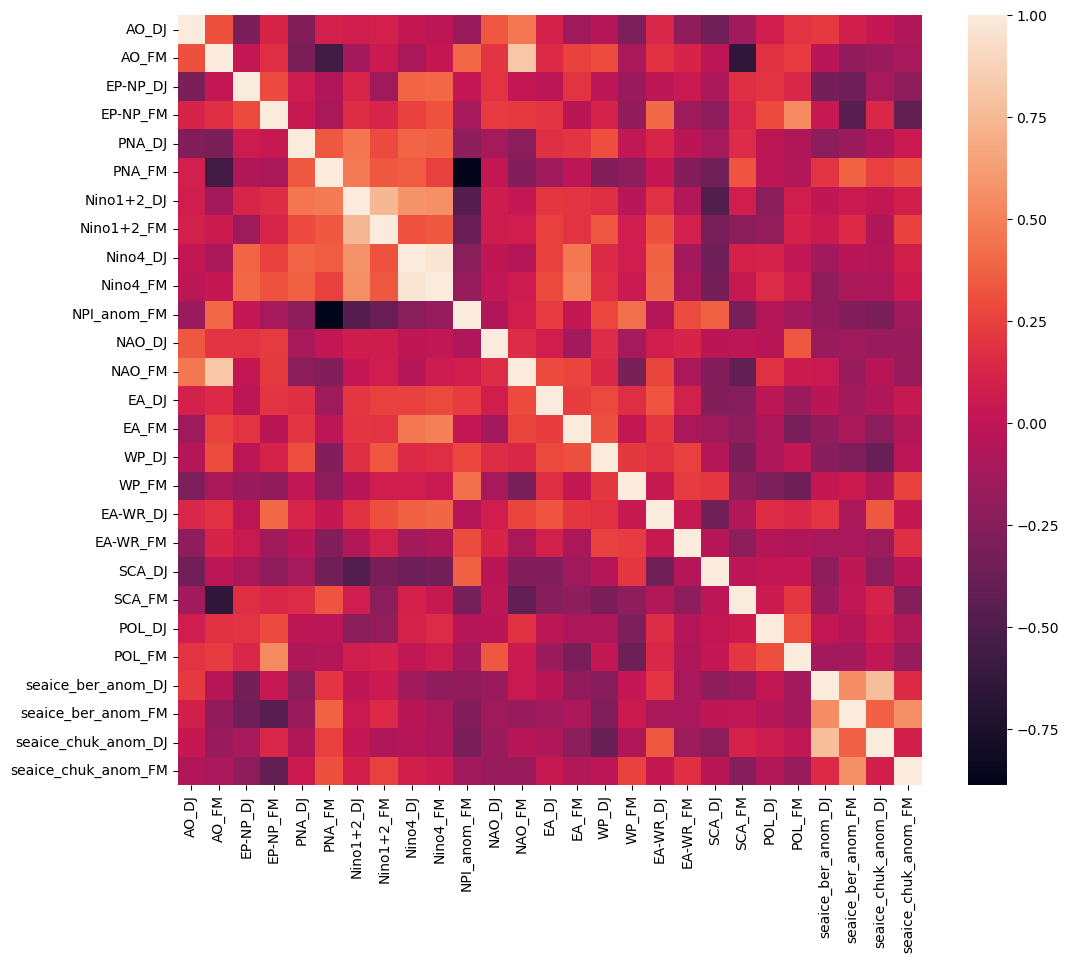

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(predictors_static.corr())

### Load breakupdata

In [ ]:
breakup = pd.read_csv(breakupdata, skiprows=3, index_col=0)
breakup['days_since_march1'] = breakup.breakup.apply(ru.datestr2dayssince)
breakup

,id,siteID,year,breakup,JulianDay,days_since_march1
0,7185,Chena River at Fairbanks,2023,2023-04-30,120,60
1,7186,Kuskokwim River at Nikolai,2023,2023-05-02,122,62
2,7188,Gakona River at Gakona,2023,2023-05-05,125,65
3,7189,Gulkana River nr Gakona,2023,2023-05-02,122,62
4,7190,Tanana River at Nenana,2023,2023-05-08,128,68
...,...,...,...,...,...,...
1528,5686,Yukon River at Kaltag,1980,1980-05-09,130,69
1529,5998,Yukon River at Ruby,1980,1980-05-07,128,67
1530,6165,Yukon River at Tanana,1980,1980-05-03,124,63
1531,6276,Yukon River at Dawson,1980,1980-05-06,127,66


In [ ]:
testDF = breakup[breakup.siteID == 'Chena River at Fairbanks'][['year', 'days_since_march1']]
testDF.set_index('year', inplace=True)
testDF.index.name == 'Year'
testDF.sort_index(inplace=True)
testDF

,days_since_march1
year,
1983,58
1985,68
1986,68
1988,55
1989,59
1990,49
1991,51
1993,30
1995,52


In [ ]:
def get_targetdf(location):
    df = breakup[breakup.siteID == location][['year', 'days_since_march1']]
    df.set_index('year', inplace=True)
    df.index.name == 'Year'
    return df.sort_index()

In [ ]:
pd.concat([predictors_static, ice, testDF], axis=1)

,AO_DJ,AO_FM,EP-NP_DJ,EP-NP_FM,PNA_DJ,PNA_FM,Nino1+2_DJ,Nino1+2_FM,Nino4_DJ,Nino4_FM,...,SCA_DJ,SCA_FM,POL_DJ,POL_FM,seaice_ber_anom_DJ,seaice_ber_anom_FM,seaice_chuk_anom_DJ,seaice_chuk_anom_FM,NenanaIceThick,days_since_march1
1980,-0.385,-1.183,0.53,0.505,-0.845,0.695,-0.165,-0.215,0.330,0.275,...,-0.535,1.045,-0.675,0.235,72796.097,75710.183,21679.526,-19276.681,39.755556,NaN
1981,-0.087,-0.989,1.02,0.000,0.945,0.740,-0.950,-0.860,-0.080,-0.170,...,-0.610,-0.140,0.990,-0.330,86952.835,26487.476,17966.648,-6019.920,39.755556,NaN
1982,-1.050,1.024,1.11,0.785,-1.085,-1.430,-0.220,-1.040,-0.060,-0.055,...,-0.525,0.725,-0.035,-0.145,40701.977,-96388.226,24221.572,-31356.242,39.755556,NaN
1983,1.163,-1.187,-0.31,-0.455,0.660,1.735,2.905,2.130,0.450,0.280,...,-1.600,-0.025,-1.035,0.030,21124.389,49359.743,15481.615,-1402.764,39.755556,58.0
1984,0.545,-1.345,-0.97,-0.215,-0.005,0.905,-0.090,-0.875,-0.830,-0.785,...,1.190,1.385,-0.150,0.740,-89707.528,94515.412,-31582.156,-29958.123,39.755556,NaN
1985,-1.180,-0.444,1.00,-1.540,-0.230,-1.090,-0.590,-1.135,-0.795,-0.860,...,0.235,0.435,-1.405,-0.120,-72888.154,-89663.552,18533.806,-1291.347,39.755556,68.0
1986,-1.258,-0.486,0.52,0.450,0.840,0.460,-0.190,-0.415,-0.245,-0.195,...,0.325,1.045,-0.020,1.535,-65567.861,-8794.729,7294.795,2074.965,39.755556,68.0
1987,-0.544,-1.610,-0.74,0.120,0.845,0.710,0.795,1.205,0.310,0.485,...,-0.600,0.255,-0.545,0.205,-16733.320,5861.737,12678.787,4041.550,39.755556,NaN
1988,-0.135,-0.632,1.13,0.065,0.265,0.875,0.345,-0.560,0.705,0.295,...,-0.630,0.545,0.730,-0.090,28827.164,28827.164,11798.344,11798.344,39.755556,55.0
1989,2.393,2.405,-1.81,1.470,-0.620,-1.635,-0.525,-0.105,-1.745,-1.345,...,-0.945,-0.880,0.165,0.790,159860.291,-167318.865,49909.344,-45284.596,42.000000,59.0


### Load per-HUC dataframes

In [ ]:
def get_perhucDF(huc6):
    df = pd.read_csv(predictordir / f"predictors_met_huc{huc6}.csv", index_col=0)
    return df.loc[1980:, :]

### Putting everything together

One dataframe for each location, including per-HUC data and target

In [ ]:
outdir  = PROJPATH / "data/DF/ML_2024"

In [ ]:
for idx, record in huctable_aug.iterrows():
    location = record.siteID
    huc6 = record.huc6
    targetdf = get_targetdf(location)
    per_huc_df = get_perhucDF(huc6)
    df_for_ML =  pd.concat([predictors_static, ice, per_huc_df, targetdf], axis=1)
    outpth = outdir / f"DF_{location.replace(' ', '_')}"
    df_for_ML.to_csv(outpth)
df_for_ML

,AO_DJ,AO_FM,EP-NP_DJ,EP-NP_FM,PNA_DJ,PNA_FM,Nino1+2_DJ,Nino1+2_FM,Nino4_DJ,Nino4_FM,...,POL_FM,seaice_ber_anom_DJ,seaice_ber_anom_FM,seaice_chuk_anom_DJ,seaice_chuk_anom_FM,NenanaIceThick,t2m,ssr,sd,days_since_march1
1980,-0.385,-1.183,0.53,0.505,-0.845,0.695,-0.165,-0.215,0.330,0.275,...,0.235,72796.097,75710.183,21679.526,-19276.681,39.755556,20.621,36.316,0.169,NaN
1981,-0.087,-0.989,1.02,0.000,0.945,0.740,-0.950,-0.860,-0.080,-0.170,...,-0.330,86952.835,26487.476,17966.648,-6019.920,39.755556,27.550,37.116,0.121,NaN
1982,-1.050,1.024,1.11,0.785,-1.085,-1.430,-0.220,-1.040,-0.060,-0.055,...,-0.145,40701.977,-96388.226,24221.572,-31356.242,39.755556,16.160,31.269,0.161,NaN
1983,1.163,-1.187,-0.31,-0.455,0.660,1.735,2.905,2.130,0.450,0.280,...,0.030,21124.389,49359.743,15481.615,-1402.764,39.755556,17.008,43.986,0.114,76.0
1984,0.545,-1.345,-0.97,-0.215,-0.005,0.905,-0.090,-0.875,-0.830,-0.785,...,0.740,-89707.528,94515.412,-31582.156,-29958.123,39.755556,20.380,42.735,0.053,85.0
1985,-1.180,-0.444,1.00,-1.540,-0.230,-1.090,-0.590,-1.135,-0.795,-0.860,...,-0.120,-72888.154,-89663.552,18533.806,-1291.347,39.755556,12.744,32.254,0.177,95.0
1986,-1.258,-0.486,0.52,0.450,0.840,0.460,-0.190,-0.415,-0.245,-0.195,...,1.535,-65567.861,-8794.729,7294.795,2074.965,39.755556,8.094,55.845,0.049,91.0
1987,-0.544,-1.610,-0.74,0.120,0.845,0.710,0.795,1.205,0.310,0.485,...,0.205,-16733.320,5861.737,12678.787,4041.550,39.755556,18.116,39.177,0.098,88.0
1988,-0.135,-0.632,1.13,0.065,0.265,0.875,0.345,-0.560,0.705,0.295,...,-0.090,28827.164,28827.164,11798.344,11798.344,39.755556,10.421,35.418,0.150,76.0
1989,2.393,2.405,-1.81,1.470,-0.620,-1.635,-0.525,-0.105,-1.745,-1.345,...,0.790,159860.291,-167318.865,49909.344,-45284.596,42.000000,14.447,36.710,0.172,89.0
